In [1]:
import urllib.request
import json
import re

In [2]:
client_id='ra7ZjcrRelgaGhvJahVf'
client_secret='Lag3Gzv1EG'

In [3]:
encText = urllib.parse.quote("안전 비상벨")

In [4]:
url = "https://openapi.naver.com/v1/search/news?query=" + encText 

In [5]:
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Tue, 17 Dec 2019 02:23:24 +0900",
"total": 26352,
"start": 1,
"display": 10,
"items": [
{
"title": "SK건설 '웨어러블 기기(Wearable Device)'인천 '운서 SK뷰 스카이시티' 적용 ...",
"originallink": "http://www.fintechpost.co.kr/news/articleView.html?idxno=95151",
"link": "http://www.fintechpost.co.kr/news/articleView.html?idxno=95151",
"description": "이 기기는 개인 맞춤형 건강관리 데이터 제공은 물론 아파트 단지 내에서 편리하고 <b>안전</b>한 생활을 위해... 특히 SK건설은 이 기기에 <b>비상벨</b> 호출과 CCTV를 함께 연동할 수 있는 기능을 국내 최초로 선보였다. 비상상황... ",
"pubDate": "Tue, 17 Dec 2019 00:26:00 +0900"

},
{
"title": "양주시, 경기북부 수부도시로 도약 '방점' 찍다",
"originallink": "http://www.newstown.co.kr/news/articleView.html?idxno=439001",
"link": "http://www.newstown.co.kr/news/articleView.html?idxno=439001",
"description": "방범, 재난, 주정차, 쓰레기단속, 산불감시 등 관내 CCTV 3,667대와 버스정보시스템(BIS), 지능형 교통체계(ITS), 신호제어시스템 등을 통합하고 시민의 <b>안전</b>을 위한 <b>비상벨</b>을 830개소와 로고젝터 96개소, LED 안내표지판을... ",
"pubDate": "Tue, 17 Dec 2019 00:12:00 +0900"

},
{
"title": "제주시, 국민행복민원실 도내 최초 인증받아",
"originall

In [6]:
def get_request_url(url):
    client_id = "ra7ZjcrRelgaGhvJahVf"
    client_secret = "Lag3Gzv1EG"   
    request = urllib.request.Request(url)   
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)

    try: 
        response = urllib.request.urlopen(request)
        if response.getcode() == 200:
            print ("Request Success")
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("Error for URL")
        return None 

In [7]:
def get_naver_search_one(search_text, start,display):
    end_point = "https://openapi.naver.com/v1/search/news"
    param_query="?query=" + urllib.parse.quote(search_text)
    param_start="&start=" + str(start)
    param_display="&display=" + str(display)
    
    url=end_point+param_query + param_start + param_display
    retData = get_request_url(url)
    
    if (retData == None):
        return None
    else:
        return json.loads(retData)

In [8]:
def main():
    jsonResult = []
    start=1
    search_text='안전 비상벨'
    display_count=100

    data=get_naver_search_one(search_text, 1,display_count)
    message=''
    while( (data!=None) and (data['display'] !=0)):

        for item in data['items']:
            title=item['title']
            description=item['description']
            message=message+re.sub(r'[^\w]','  ',description)+' '
            date=item['pubDate']
            jsonResult.append({'title':title, 'description':description,'date':date})

        next_start = data['start'] + data['display']  
        data=get_naver_search_one(search_text, next_start,display_count)
    
    with open('news_answer.json', 'w', encoding='utf-8') as outfile:
        retJson =json.dumps(jsonResult, indent=4, ensure_ascii = False)
        outfile.write(retJson)
        
    print ('naver_news.json SAVED')
    print(message[:1000])
    displayWordCloud(message,'white', 800, 600)

In [9]:
!pip install wordcloud

Traceback (most recent call last):
  File "C:\Users\yangyoungjo\Anaconda3\Scripts\pip-script.py", line 10, in <module>
    sys.exit(main())
TypeError: 'module' object is not callable


In [10]:
!pip install --user  --upgrade pip

Traceback (most recent call last):
  File "C:\Users\yangyoungjo\Anaconda3\Scripts\pip-script.py", line 10, in <module>
    sys.exit(main())
TypeError: 'module' object is not callable


In [11]:
!pip install wordcloud

Traceback (most recent call last):
  File "C:\Users\yangyoungjo\Anaconda3\Scripts\pip-script.py", line 10, in <module>
    sys.exit(main())
TypeError: 'module' object is not callable


In [12]:
import matplotlib.pyplot as plt

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
def displayWordCloud(data, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = 'c:/Windows/fonts/malgun.ttf',
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                        width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
HTTP Error 400: Bad Request
Error for URL
naver_news.json SAVED
이  기기는  개인  맞춤형  건강관리  데이터  제공은  물론  아파트  단지  내에서  편리하고    b  안전    b  한  생활을  위해        특히  SK건설은  이  기기에    b  비상벨    b    호출과  CCTV를  함께  연동할  수  있는  기능을  국내  최초로  선보였다    비상상황         방범    재난    주정차    쓰레기단속    산불감시  등  관내  CCTV  3  667대와  버스정보시스템  BIS      지능형  교통체계  ITS      신호제어시스템  등을  통합하고  시민의    b  안전    b  을  위한    b  비상벨    b  을  830개소와  로고젝터  96개소    LED  안내표지판을         제주시는  행정  b  안전    b  부가  추진하고  있는  2019년  국민행복민원실에서  최초로  인증기관으로  선정돼  도내에서는        및    b  비상벨    b    설치    건강측정  코너  운영    휠체어    보청기  등  보조기구  확충  매월  민원실  친절도  품질평가  및         특히  방범    재난    주정차    쓰레기단속    산불감시  등  관내  CCTV  3천667대와  버스정보시스템  BIS      지능형  교통체계  ITS      신호제어시스템  등을  통합하고  시민의    b  안전    b  을  위한    b  비상벨    b  을  830개소와  로고젝터  96개소    LED           b  안전    

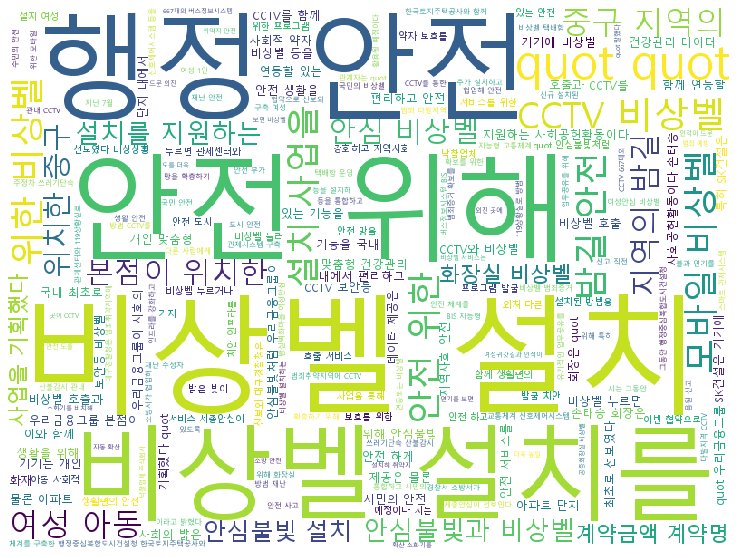

In [15]:
if __name__ == '__main__':
    main()

In [16]:
encText1 = urllib.parse.quote("범죄 CCTV")

In [17]:
url1 = "https://openapi.naver.com/v1/search/news?query=" + encText1

In [18]:
request = urllib.request.Request(url1)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Tue, 17 Dec 2019 02:23:35 +0900",
"total": 123942,
"start": 1,
"display": 10,
"items": [
{
"title": "국회, 입법조사처...공공 <b>CCTV</b>의 통합운영 실태 및 개선에 관한 세미나 개최",
"originallink": "http://nbntv.co.kr/news/view/772898",
"link": "http://nbntv.co.kr/news/view/772898",
"description": "본 정책세미나에서는 <b>CCTV</b> 통합관제센터에서 수집하는 <b>CCTV</b> 영상정보의 오·남용을 예방하고, <b>범죄</b>예방·재난재해 예방 등 본연의 설치목적으로 영상정보를 활용될 수 있는 합법적인 방안을 토론하는 한편, 영상정보의... ",
"pubDate": "Tue, 17 Dec 2019 01:54:00 +0900"

},
{
"title": "[픽뉴스] 저승사자 동상·자리 바꿔치기",
"originallink": "http://www.mbn.co.kr/pages/news/newsView.php?news_seq_no=4010988",
"link": "https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=057&aid=0001403948",
"description": "【 앵커멘트 】 이제는 <b>CCTV</b>도 많고 차량엔 블랙박스까지 대부분 설치됐으니 바꿔치기 <b>범죄</b>는 아예 생각하지 말아야겠습니다. 그 이전에 음주운전은 더 해선 안 되고요. 여기까지 듣겠습니다. 영상편집 : 박찬규 ▶파격... ",
"pubDate": "Mon, 16 Dec 2019 20:53:00 +0900"

},
{
"title": "[사설]경기북부 스쿨존 <b>CCTV</b>, 신속히 설치하라",
"originallink": "http://www.kgnews.co.kr/n

In [19]:
def main():
    jsonResult = []
    start=1
    search_text='범죄 CCTV'
    display_count=100

    data=get_naver_search_one(search_text, 1,display_count)
    message=''
    while( (data!=None) and (data['display'] !=0)):

        for item in data['items']:
            title=item['title']
            description=item['description']
            message=message+re.sub(r'[^\w]','  ',description)+' '
            date=item['pubDate']
            jsonResult.append({'title':title, 'description':description,'date':date})

        next_start = data['start'] + data['display']  
        data=get_naver_search_one(search_text, next_start,display_count)
    
    with open('news_answer.json', 'w', encoding='utf-8') as outfile:
        retJson =json.dumps(jsonResult, indent=4, ensure_ascii = False)
        outfile.write(retJson)
        
    print ('naver_news.json SAVED')
    print(message[:1000])
    displayWordCloud(message,'white', 800, 600)

Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
Request Success
HTTP Error 400: Bad Request
Error for URL
naver_news.json SAVED
본  정책세미나에서는    b  CCTV    b    통합관제센터에서  수집하는    b  CCTV    b    영상정보의  오  남용을  예방하고      b  범죄    b  예방  재난재해  예방  등  본연의  설치목적으로  영상정보를  활용될  수  있는  합법적인  방안을  토론하는  한편    영상정보의             앵커멘트      이제는    b  CCTV    b  도  많고  차량엔  블랙박스까지  대부분  설치됐으니  바꿔치기    b  범죄    b  는  아예  생각하지  말아야겠습니다    그  이전에  음주운전은  더  해선  안  되고요    여기까지  듣겠습니다    영상편집      박찬규    파격         이에따라    어린이보호구역  스쿨존      과속  단속  카메라    b  CCTV    b        설치  의무화    지방자치단체장의  신호등  우선  설치  도로교통법  일부개정안      스쿨존  내  사망사고  가해자의  가중처벌  특정  b  범죄    b    가중처벌  법률개정안  이             앵커      사실  저희  취재  내용에는  방송으로  그대로  전해  드릴  수  없는  더  충격적인    b  범죄    b  도  많았습니다          바닥에는  큼지막하게  어린이보호구역  글씨가  새겨져있고      b  CCTV    b  도  곳곳에  설치돼있습니다    조금만  걸어가면         이런  성    b  범죄    b    흉악범  들로부터  여성

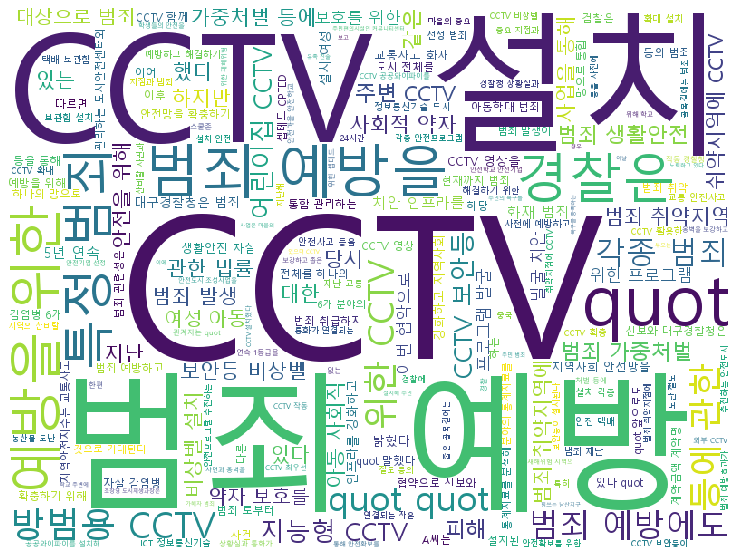

In [20]:
if __name__ == '__main__':
    main()